<a href="https://colab.research.google.com/github/LucasRosas/MVP-2-Colab/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import joblib  # import do joblib

## 1. Carga dos dados
Acessei UCI Machine Learning Repository, avancei algumas páginas e encontrei "Mushroom", um dataset que traz características de cogumelos e a indicação se é venenoso ou comestível.

Fiz o download dos dados e subi para um repositório no git. O carregamento é feito pelo raw. A documentação trouxe o nome das 23 colunas e algumas informações sobre os dados.

A seguir temos a leitura dos dados, a criação do csv e a exibição das primeiras 5 linhas:

In [2]:
import pandas as pd

url_dados = 'https://raw.githubusercontent.com/LucasRosas/MVP-2-Colab/refs/heads/main/mushroom/agaricus-lepiota.data'

# labels dos atributos do dataset
labels_atributos = ['classificacao', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
                    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# carga do dataset através do csv
iris = pd.read_csv(url_dados, names=labels_atributos)

# verifica o tipo de iris
print(type(iris))

# exibe as 5 primeiras linhas
iris.head()



<class 'pandas.core.frame.DataFrame'>


,classificacao,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 2. Transformação de dados
A transformação dos dados vai ser feita considerando apenas as primeiras 5 colunas e posteriormente será usado o OneHotEncoder quando possível para transformar as letras em vetores de números.

In [3]:
colunas_usadas = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']

## 3. Separação entre treino e teste (houldout)

Primeiro fiz a separação na dimensão das linhas: X (dados) e y (Classificação).

Depois, fiz a separação na dimensão das colunas: X_train (dados para treinamento), X_test (dados para teste), y_train (classificação para treinamento) e y_test (classificação para teste)

Também estou salvando os dados de teste num csv.

In [4]:
from sklearn.model_selection import train_test_split

test_size = 0.30 # tamanho do conjunto de teste
seed = 42 # semente aleatória

X = iris[colunas_usadas]
y = iris['classificacao']  # 'e' para edible e 'p' para poisonous

X_train, X_test, y_train, y_test =  train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y)

# Junta X_test e y_test em um único DataFrame
test_data = pd.concat([X_test, y_test], axis=1)

# Salva em um CSV
test_data.to_csv('dados_teste.csv', index=False, encoding='utf-8')

scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## 4. Modelagem

Como os dados são categóricos (letras, palavras) utilizei a técnica de One Hot Encoging para converter as variáveis em vetores binários.

Depois passei para o treinamento dos modelos utilizando pipeline do sklearn, sem alterar nenhum parâmetro. O ajuste dos hiperparâmetros será feito na sequência e a análise dos resultados.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transforma 'e' e 'p' para 0 e 1
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

KNN - Score: 0.9951 - Acurácia média na validação cruzada: 0.9933
DecisionTree - Score: 0.9971 - Acurácia média na validação cruzada: 0.9930
NaiveBayes - Score: 0.9877 - Acurácia média na validação cruzada: 0.9854
SVM - Score: 0.9967 - Acurácia média na validação cruzada: 0.9944


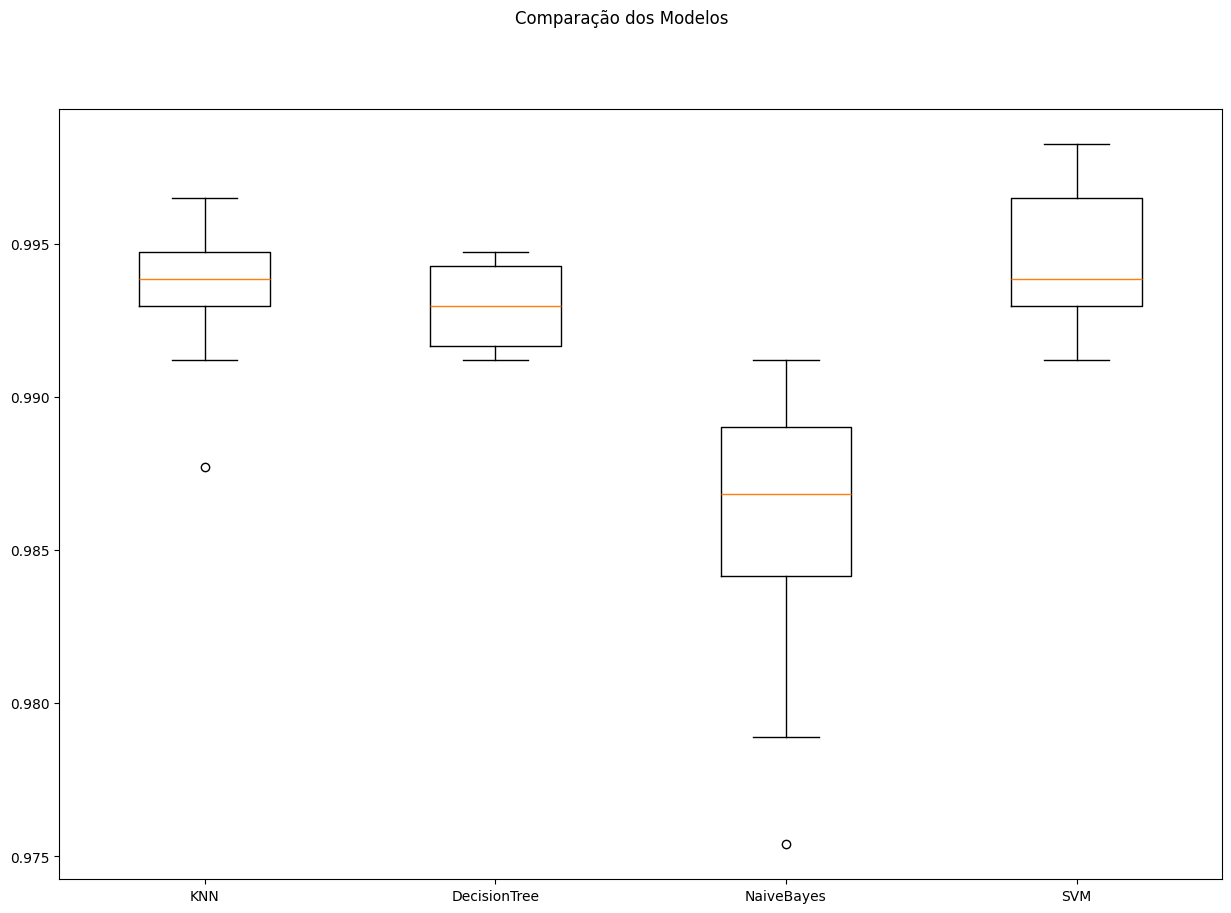

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

np.random.seed(7) # definindo uma semente global


# Todas as colunas são categóricas
categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipelines = []

models = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB(),
    'SVM': SVC(probability=True)
}

results = []
names = []

for nome, modelo in models.items():
    if nome in ['KNN', 'SVM']:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('scaler', StandardScaler(with_mean=False)),
            ('classifier', modelo)
        ])
    # O GaussianNB não aceita sparse matrix (padrão do OneHotEncoder), então precisei configurar o OneHotEncoder para gerar uma saida densa.
    elif nome == 'NaiveBayes':
        preprocessor_dense = ColumnTransformer([
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ])
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor_dense),
            ('classifier', modelo)
        ])
    # caso DecisionTree não utilizamos o processor.
    else:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', modelo)
        ])

    pipelines.append((nome, pipeline))

    pipeline.fit(X_train, y_train_encoded)
    # mostrando a acurária
    score = pipeline.score(X_test, y_test_encoded)
    cv_results = cross_val_score(pipeline, X_train, y_train_encoded, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(nome)
    print(f"{nome} - Score: {score:.4f} - Acurácia média na validação cruzada: {cv_results.mean():.4f}")

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



Se tudo rodou como deveria para test_size=0.3 e random_state=42 encontramos o seguite:

| Modelo           | Score no Teste | Acurácia Média na Validação Cruzada |
| ---------------- | -------------- | ----------------------------------- |
| **KNN**          | 0.9951         | 0.9933                              |
| **DecisionTree** | 0.9971         | 0.9930                              |
| **NaiveBayes**   | 0.9877         | 0.9854                              |
| **SVM**          | 0.9967         | 0.9944                              |




## 5 Otimização de hiperparâmetros



Os dados são todos catégóricos, então não usarei StandardScaler nem MinMaxScaler.

### KNN
A acurácia do KNN inicialmente foi de 0.9951. Utilizando o GridSearchCV para variar os parâmetros, quero encontrar os melhores parâmetros e a acurárias.

In [15]:
from sklearn.model_selection import GridSearchCV


pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', KNeighborsClassifier())
])

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train_encoded)

# Atualiza o pipeline com os melhores parâmetros
best_pipeline_knn = grid_knn.best_estimator_

# Agora sim, avalia com o pipeline otimizado
cv_results = cross_val_score(best_pipeline_knn, X_train, y_train_encoded, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('grid_knn')

# Avaliação final
test_accuracy = grid_knn.score(X_test, y_test_encoded)

# Exibe resultados
print(f"Melhor média de acurácia na validação cruzada (GridSearchCV): {grid_knn.best_score_:.4f}")
print("Melhores parâmetros (KNN):", grid_knn.best_params_)

acc_test_knn = best_pipeline_knn.score(X_test, y_test_encoded)
print(f"[KNN] Acurácia no teste (dados não vistos): {acc_test_knn:.4f}")


joblib.dump(best_pipeline_knn, 'best_model_knn.pkl')
print("Modelo salvo em 'best_model_knn.pkl'")

Acurácia média na validação cruzada (melhor modelo): 0.9937
Melhores parâmetros (KNN): {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Acurácia (melhor média no GridSearch): 0.9937
Acurácia no teste: 0.9930
Modelo salvo em 'best_model_knn.pkl'


Nessa configuração do KNN {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'} a acurácia média chegou em 0.9937 na validação cruzada.

### Árvore de Classificação

Utilizando esse algoritmo obtemos acurácia 0.9971. Utilizei o GridSearch para avaliar o desempenho:

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Definindo a grade de hiperparâmetros
param_grid_dt = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__criterion': ['gini', 'entropy']
}

# Executando GridSearchCV
grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train_encoded)

# Atualizando o pipeline com os melhores parâmetros
best_pipeline_dt = grid_dt.best_estimator_

# Avaliando com cross_val_score usando os melhores parâmetros
cv_results = cross_val_score(best_pipeline_dt, X_train, y_train_encoded, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('grid_dt')

# Exibindo os resultados
print(f"Melhor média de acurácia na validação cruzada (GridSearchCV):: {grid_dt.best_score_:.4f}")
print("Melhores parâmetros (DecisionTreeClassifier):", grid_dt.best_params_)

acc_test_dt = best_pipeline_dt.score(X_test, y_test_encoded)
print(f"[DecisionTreeClassifier] Acurácia no teste (dados não vistos): {acc_test_dt:.4f}")

joblib.dump(best_pipeline_dt, 'best_model_dt.pkl')
print("Modelo salvo em 'best_model_dt.pkl'")


Melhor média de acurácia na validação cruzada (GridSearchCV):: 0.9931
Melhores parâmetros (DecisionTreeClassifier): {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_split': 20}
[DecisionTreeClassifier] Acurácia no teste (dados não vistos): 0.9971
Modelo salvo em 'best_model_dt.pkl'


Vemos aqui que o aparentemente a configuração padrão e a otimizada obtiveram o mesmo valor de acurária.

### Naive Bayes

O modelo original (`GaussianNB`) obteve acurácia de 0.9877.
Aqui vou usar o MultinomialNB.


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

# Pré-processamento ajustado para Naive Bayes (denso)
preprocessor_dense = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
], remainder='passthrough')

# Pipeline Naive Bayes
pipeline_nb = Pipeline(steps=[
    ('preprocessor', preprocessor_dense),
    ('classifier', MultinomialNB())
])

# Grade de hiperparâmetros
param_grid = {
    'classifier__alpha': [0.1, 0.5, 1.0, 2.0],
    'classifier__fit_prior': [True, False]
}

# GridSearchCV (no treino, como os outros modelos)
grid_nb = GridSearchCV(pipeline_nb, param_grid, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train_encoded)

# Atualizando o pipeline com os melhores hiperparâmetros
best_pipeline_nb = grid_nb.best_estimator_

# Validação cruzada com os melhores parâmetros
cv_results = cross_val_score(best_pipeline_nb, X_train, y_train_encoded, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('grid_nb')

# Exibindo os resultados
print(f"Melhor média de acurácia na validação cruzada (GridSearchCV):: {grid_nb.best_score_:.4f}")
print("Melhores parâmetros (MultinomialNB):", grid_nb.best_params_)

acc_test_nb = best_pipeline_nb.score(X_test, y_test_encoded)
print(f"[NaiveBayes] Acurácia no teste (dados não vistos): {acc_test_nb:.4f}")

joblib.dump(best_pipeline_nb, 'best_model_nb.pkl')
print("Modelo salvo em 'best_model_nb.pkl'")



Melhor média de acurácia na validação cruzada (GridSearchCV):: 0.9851
Melhores parâmetros (MultinomialNB): {'classifier__alpha': 0.1, 'classifier__fit_prior': True}
[NaiveBayes] Acurácia no teste (dados não vistos): 0.9869
Modelo salvo em 'best_model_nb.pkl'


Pelo visto, a acurácia diminui utilizando MultinomialNB e possibilitando mudar os parâmetros de alpha e fit_prior. Esse é um modelo que definitivamente é candidato a descarte.

### SVM

O modelo original obteve acurácia de 0.9967. USadno GridSearchCV, vou variar os seguintes parâmetros:

- C: parâmetro de penalidade de margem (valores menores toleram mais erros).
- kernel: tipo de kernel ('linear', 'rbf', 'poly', 'sigmoid').
- gamma: controla a influência dos exemplos de treino (apenas para 'rbf', 'poly', 'sigmoid').

In [26]:
# Pré-processador e pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Necessário após OneHotEncoder
    ('classifier', SVC())
])

# Grade de hiperparâmetros
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto'],  # Só afeta alguns kernels
    'classifier__probability': [True]
}

# GridSearchCV
grid_svm = GridSearchCV(pipeline_svm, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train_encoded)

# Pegando o pipeline otimizado
best_pipeline_svm = grid_svm.best_estimator_

# Validação cruzada com os melhores hiperparâmetros
cv_results = cross_val_score(best_pipeline_svm, X_train, y_train_encoded, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('grid_svm')


# Exibindo os resultados
print(f"Melhor média de acurácia na validação cruzada (GridSearchCV):: {grid_svm.best_score_:.4f}")
print("Melhores parâmetros (SVM):", grid_svm.best_params_)

acc_test_svm = best_pipeline_svm.score(X_test, y_test_encoded)
print(f"[SVM] Acurácia no teste (dados não vistos): {acc_test_svm:.4f}")

joblib.dump(best_pipeline_svm, 'best_model_svm.pkl')
print("Modelo salvo em 'best_model_svm.pkl'")


Melhor média de acurácia na validação cruzada (GridSearchCV):: 0.9944
Melhores parâmetros (SVM): {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'classifier__probability': True}
[NaiveBayes] Acurácia no teste (dados não vistos): 0.9967
Modelo salvo em 'best_model_svm.pkl'


A acurácia caiu para 0.9944 utilizando 'classifier__C': 1, 'classifier__gamma': 'scale' e 'classifier__kernel': 'rbf'.

## Avaliação e comparação de resultados


| Modelo        | Score Inicial | Acurácia CV Antes | Acurácia CV GridSearch | Score no Teste Final |
|---------------|---------------|-------------------|------------------------|----------------------|
| **KNN**       | 0.9951        | 0.9933            | 0.9937                 | 0.9930               |
| **DecisionTree** | 0.9971      | 0.9930            | 0.9931                 | 0.9971               |
| **NaiveBayes**  | 0.9877      | 0.9854            | 0.9851                 | 0.9869               |
| **SVM**       | 0.9967        | 0.9944            | 0.9944                 | 0.9967               |


* **DecisionTree** teve o melhor desempenho no teste: **0.9971**
* **SVM** foi muito consistente: mesma média na validação cruzada e bom score no teste (**0.9967**)
* **KNN** foi bastante estável, mas o score no teste caiu um pouco (**0.9930**)
* **NaiveBayes** foi o mais fraco, com uma acurácia menor (**0.9869**)

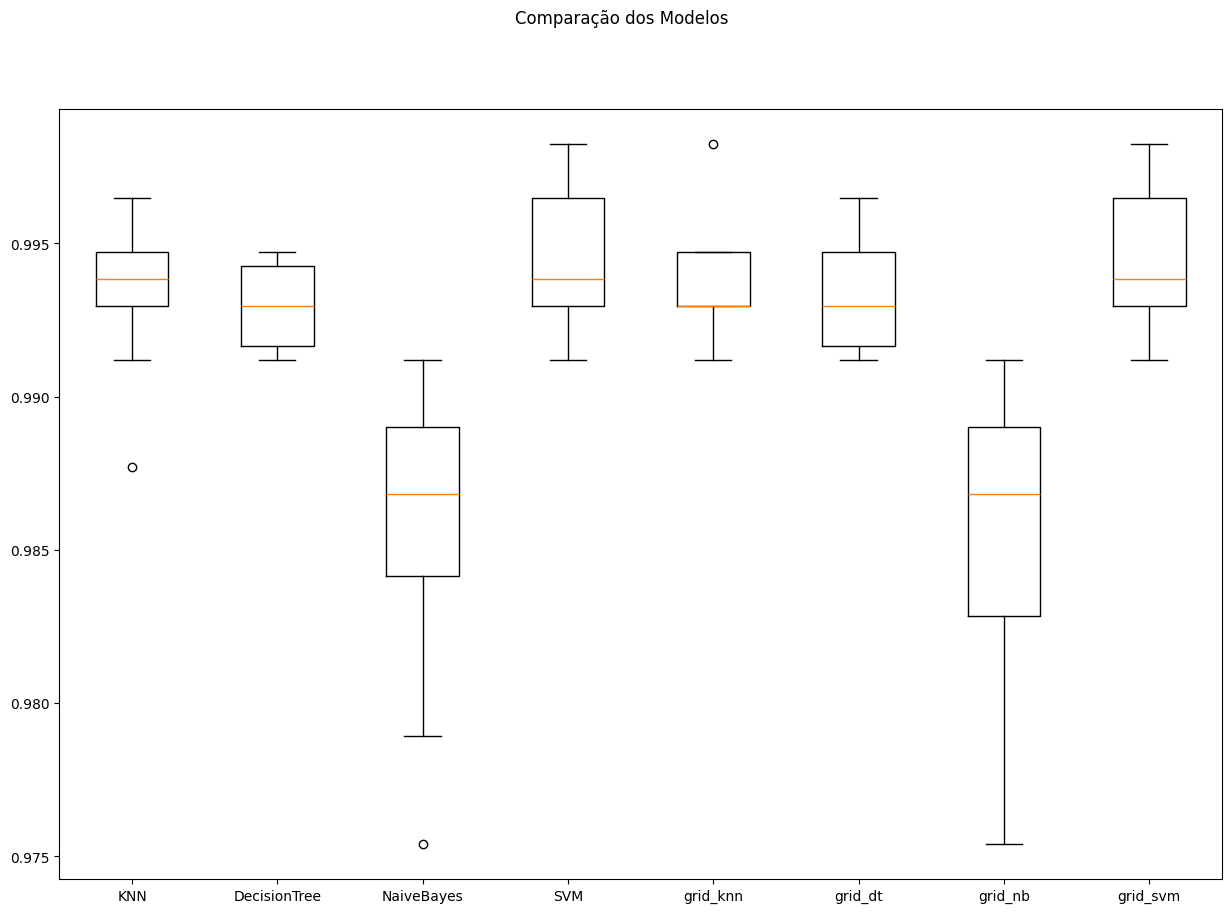

In [10]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

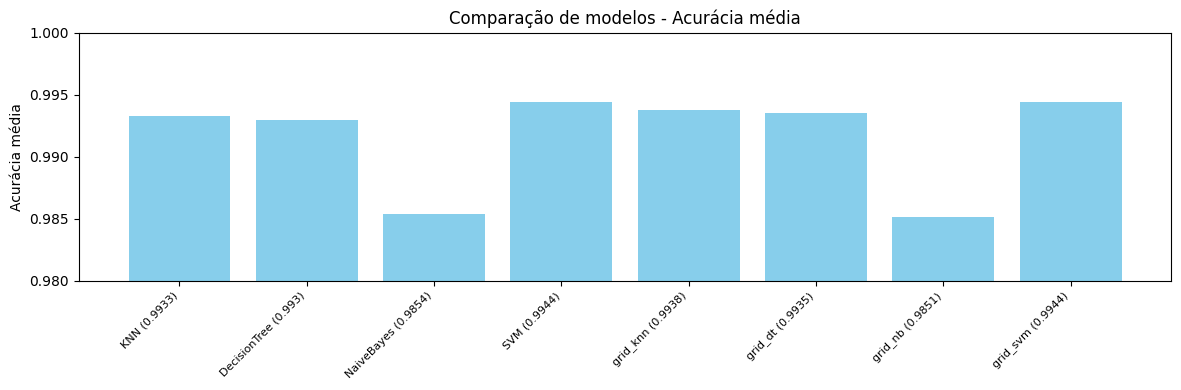

In [11]:
medias = [round(float(i.mean()), 4) for i in results]
medias_clean = [0 if np.isnan(x) else x for x in medias]

plt.figure(figsize=(12, 4))  # menos altura
bars = plt.bar(range(len(names)), medias_clean, color='skyblue')

names_x = [f'{i} ({m})' for i,m in zip(names, medias_clean)]

plt.xticks(range(len(names)), names_x, rotation=45, ha='right', fontsize=8)
plt.ylabel('Acurácia média')
plt.title('Comparação de modelos - Acurácia média')
plt.ylim(0.98, 1.0)

plt.tight_layout()
plt.show()


In [12]:
print(names_x)

['KNN (0.9933)', 'DecisionTree (0.993)', 'NaiveBayes (0.9854)', 'SVM (0.9944)', 'grid_knn (0.9938)', 'grid_dt (0.9935)', 'grid_nb (0.9851)', 'grid_svm (0.9944)']


Com os resultados apresentados, poderíamos escolher o KNN otimizado ou o SVM otimizado.

## 6. Exportação do modelo treinado

Todos os modelos já foram exportados.

In [13]:
# salvar o modelo
joblib.dump(best_pipeline_svm, 'modelo_knn_cogumelos.pkl')

# depois, para carregar:
# modelo_carregado = joblib.load('modelo_knn_cogumelos.pkl')

['modelo_knn_cogumelos.pkl']

In [14]:
import joblib
import pandas as pd

# Carrega o modelo
modelo = joblib.load("modelo_knn_cogumelos.pkl")

# Lista completa de atributos (exceto o alvo)
atributos = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']

# Dado parcial (exemplo real)
entrada_parcial = {
    'cap-shape': 'c',
    'cap-surface': 'x',
    'cap-color': 'y',
    'bruises': 'f',
    'odor': 'n'
}

# Preenche os outros com valores neutros ou '?'
entrada_completa = {col: entrada_parcial.get(col, '?') for col in atributos}

# Cria DataFrame com uma linha
df_teste = pd.DataFrame([entrada_completa])

# Faz a previsão
probabilidades = modelo.predict_proba(df_teste)

# Mapear o índice da classe
classes = modelo.classes_
mapa_classes = {0: 'comestível', 1: 'venenoso'}

label_encoder.fit(iris['classificacao'])
print(label_encoder.classes_)

# Mostra as chances
for classe, prob in zip(classes, probabilidades[0]):
    nome_legivel = mapa_classes.get(classe, classe)
    print(f"Probabilidade de ser {nome_legivel}: {prob:.2%}")

['e' 'p']
Probabilidade de ser e: 0.00%
Probabilidade de ser p: 100.00%
